In [1]:
import numpy as np
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('train.csv', encoding='utf-8')

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_17192\2136873402.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv', encoding='utf-8')


# feature processing

## feature grouping

In [133]:
cat = [
    'Month',
    'Occupation',
    'Type_of_Loan',  # to be processed (6000 unique values)
    'Credit_Mix',
    'Payment_of_Min_Amount',
]

In [134]:
num = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary', 
    'Num_Bank_Accounts',
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Amount_invested_monthly',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Changed_Credit_Limit', # BINARY FEATURE CAN BE CREATED IF '-' SYMBOL IS MET. '-' WILL BE FILLED WITH NONE
]

In [135]:
feat_remove = ['ID', 'Customer_ID', 'Name', 'SSN']
feat_to_process = ['Credit_History_Age', 'Payment_Behaviour']  # Type_of_Loan can also be processed

In [136]:
target = 'CreditScore'

# general processing

In [137]:
#numeric features processing 
for f in num:
    df[f] = pd.to_numeric(df[f], errors='coerce')
    if f not in [
        'Delay_from_due_date',
        'Monthly_Balance',
        'Outstanding_Debt',
    ]:
        # for Changed_Credit_Limit feature None means that the limit was not changed
        df[f] = df[f].apply(lambda x: x if x > 0 else None)

In [138]:
df[cat].nunique()

Month                       8
Occupation                 16
Type_of_Loan             6260
Credit_Mix                  4
Payment_of_Min_Amount       3
dtype: int64

In [139]:
for f in cat:
    print(pd.Series(df[f].unique()).head(20))

0     January
1    February
2       March
3       April
4         May
5        June
6        July
7      August
dtype: object
0         Scientist
1           _______
2           Teacher
3          Engineer
4      Entrepreneur
5         Developer
6            Lawyer
7     Media_Manager
8            Doctor
9        Journalist
10          Manager
11       Accountant
12         Musician
13         Mechanic
14           Writer
15        Architect
dtype: object
0     Auto Loan, Credit-Builder Loan, Personal Loan,...
1                                   Credit-Builder Loan
2               Auto Loan, Auto Loan, and Not Specified
3                                         Not Specified
4                                                   NaN
5                Credit-Builder Loan, and Mortgage Loan
6            Not Specified, Auto Loan, and Student Loan
7     Personal Loan, Debt Consolidation Loan, and Au...
8                        Not Specified, and Payday Loan
9     Credit-Builder Loan, Personal 

## feature specific processing

In [140]:
df.Age = df.Age.apply(lambda x: x if 18 < x < 100 else None)

In [141]:
df.Occupation.replace('_______', None, inplace=True)
df.Credit_Mix.replace('_', None, inplace=True)

In [142]:
df.head(100)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,None,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0x168d,CUS_0xc0ab,August,Soyoungd,33.0,342-90-2649,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,30.870799,26 Years and 0 Months,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,Good
96,0x1692,CUS_0x3e45,January,Harriet McLeodd,35.0,414-53-2918,Entrepreneur,54392.16,4766.680000,6.0,...,Standard,179.22,25.649246,26 Years and 10 Months,Yes,124.392082,243.735437,Low_spent_Large_value_payments,378.540480,Standard
97,0x1693,CUS_0x3e45,February,Harriet McLeodd,NaN,414-53-2918,Entrepreneur,54392.16,4766.680000,6.0,...,Standard,179.22,29.408775,26 Years and 11 Months,Yes,124.392082,142.751864,High_spent_Medium_value_payments,459.524053,Standard
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35.0,#F%$D@*&8,Entrepreneur,NaN,NaN,6.0,...,None,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349569,High_spent_Large_value_payments,558.926349,Standard


# feature creation

In [143]:
df['credit_limit_was_changed'] = df.Changed_Credit_Limit.isna().astype(int)

In [144]:
df.credit_limit_was_changed.value_counts()

0    96319
1     3681
Name: credit_limit_was_changed, dtype: int64

In [145]:
df.to_csv('processed_with_no_strings.csv')

In [146]:
for f in num:
    outlier_bound = df[f].quantile(0.995)
    df[f] = df[f].apply(lambda x: x if x<outlier_bound else None)
    

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # mean
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None_Category')),  # mean
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imp', numeric_transformer, num),
        ('onehot', categorical_transformer, [c for c in cat if c != 'Type_of_Loan']),
    ]
).set_output(transform='pandas')


# Create the final pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
    ])



In [148]:
preprocessed_df = pipeline.fit_transform(df)

In [24]:
preprocessed_df.head()

,num_imp__Age,num_imp__Annual_Income,num_imp__Monthly_Inhand_Salary,num_imp__Num_Bank_Accounts,num_imp__Num_Credit_Card,num_imp__Interest_Rate,num_imp__Num_of_Loan,num_imp__Delay_from_due_date,num_imp__Num_of_Delayed_Payment,num_imp__Outstanding_Debt,...,onehot__Occupation_Teacher,onehot__Occupation_Writer,onehot__Occupation_None,onehot__Credit_Mix_Bad,onehot__Credit_Mix_Good,onehot__Credit_Mix_Standard,onehot__Credit_Mix_None,onehot__Payment_of_Min_Amount_NM,onehot__Payment_of_Min_Amount_No,onehot__Payment_of_Min_Amount_Yes
0,-1.308159,-0.116059,-0.747726,-0.124043,-0.132537,-0.145945,-0.007476,-1.231183,-0.166958,-0.530172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.308159,-0.116059,-0.312277,-0.124043,-0.132537,-0.145945,-0.007476,-1.509165,-0.040043,-0.530172,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.043835,-0.116059,-0.312277,-0.124043,-0.132537,-0.145945,-0.007476,-1.231183,-0.166958,-0.530172,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.308159,-0.116059,-0.312277,-0.124043,-0.132537,-0.145945,-0.007476,-1.092192,-0.221350,-0.530172,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.308159,-0.116059,-0.747726,-0.124043,-0.132537,-0.145945,-0.007476,-1.022697,-0.040043,-0.530172,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [149]:
preprocessed_df.shape

(100000, 47)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubp

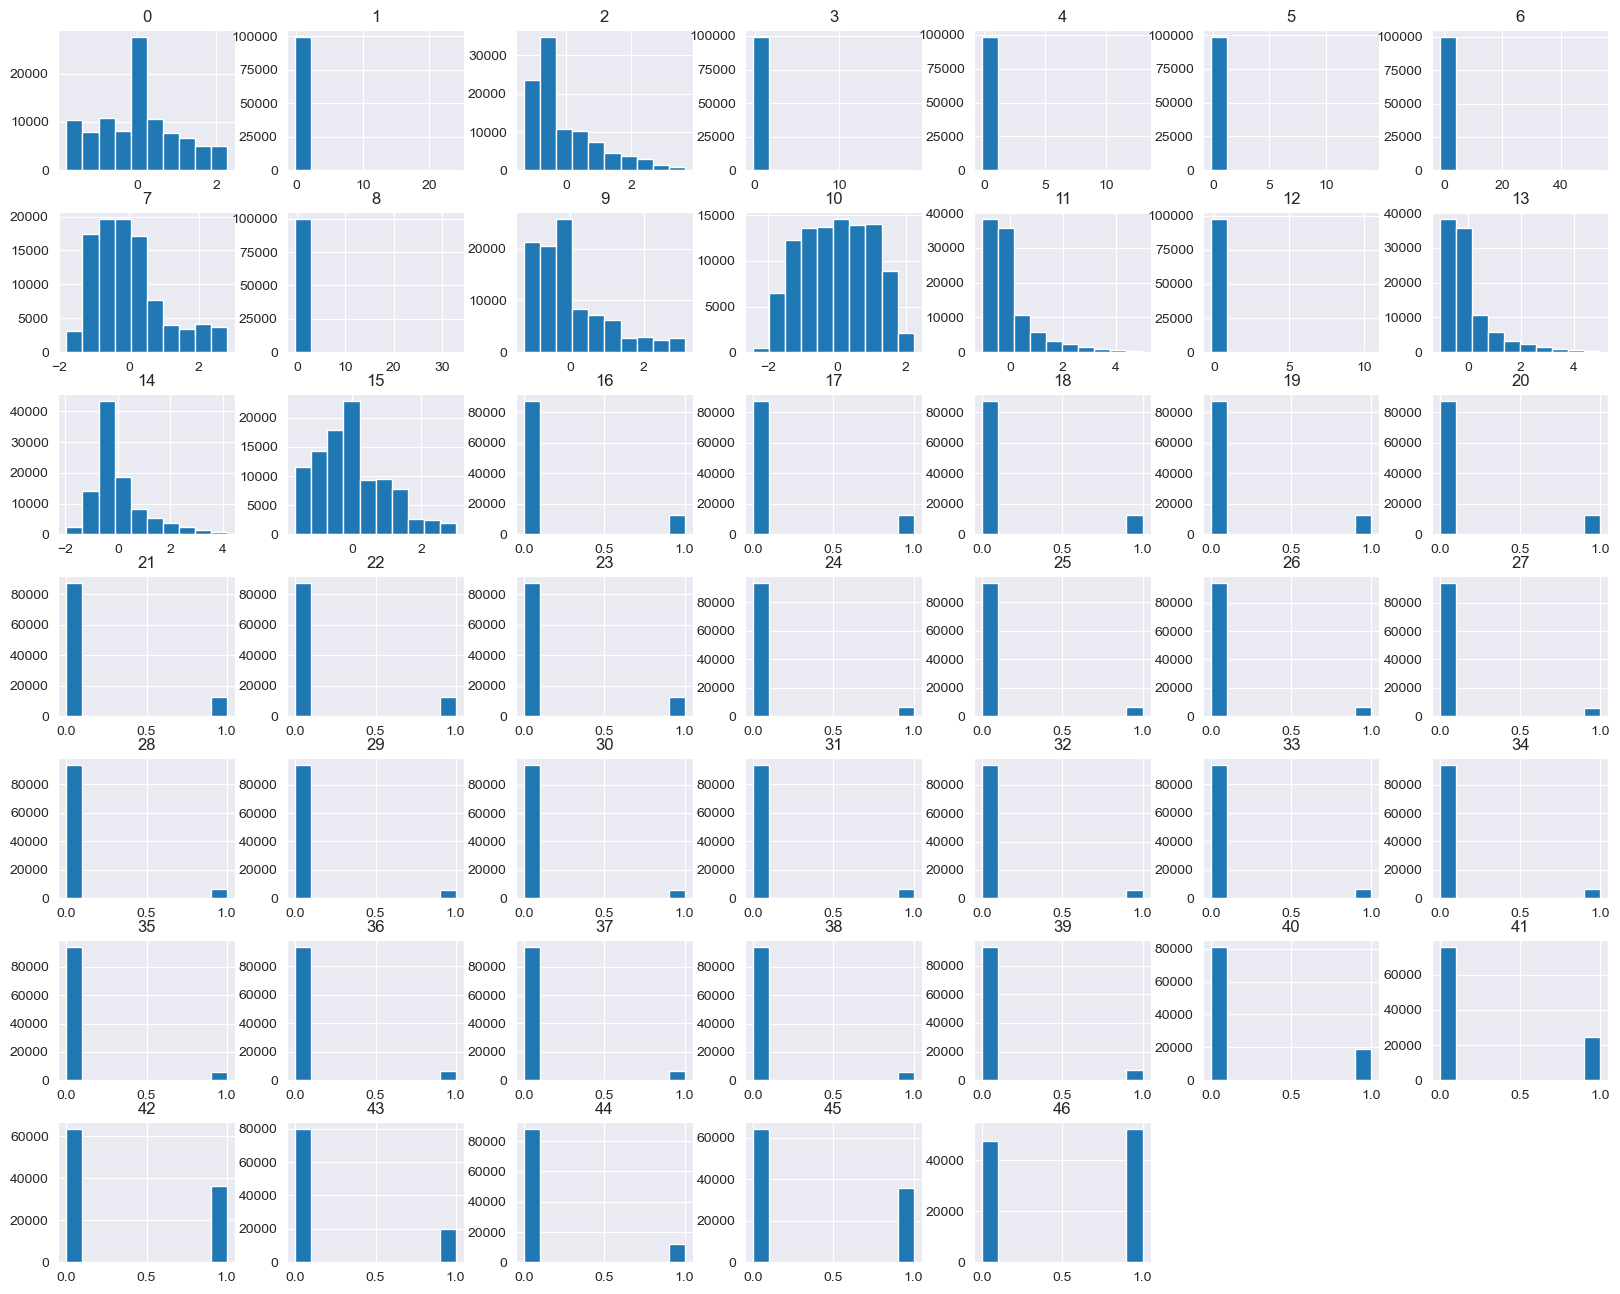

In [51]:
pd.DataFrame(preprocessed_df).hist(figsize=[20, 16])

In [150]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [151]:
target = label_encoder.fit_transform(df['Credit_Score'])

In [152]:
pd.Series(target).value_counts()

2    53174
1    28998
0    17828
dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [56]:
lr.fit(preprocessed_df, target)

LogisticRegression()

In [57]:
predictions = lr.predict(preprocessed_df)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(target, predictions))
print(confusion_matrix(target, predictions))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>],
       [<AxesSubplot:title={'center':

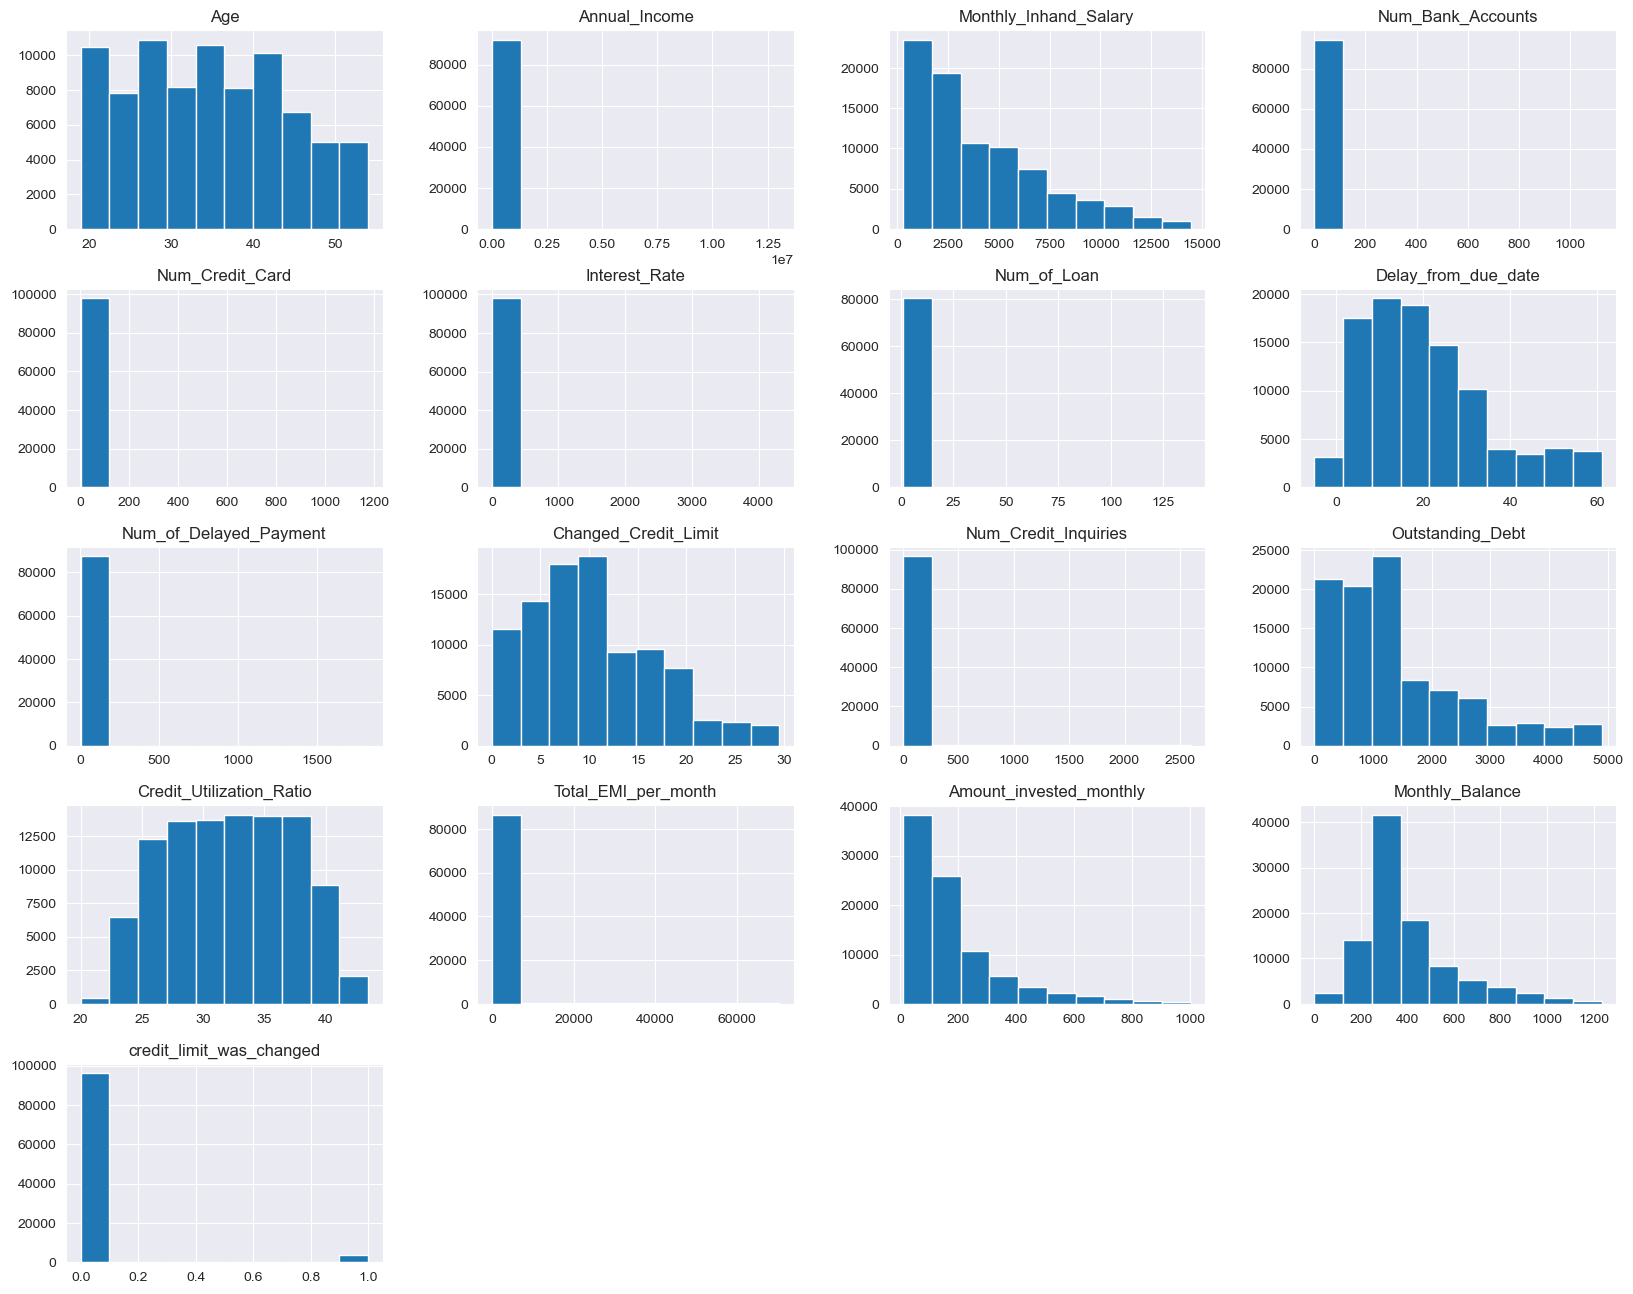

In [59]:
df.hist(figsize=[20, 16])

array([[<AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>]],
      dtype=object)

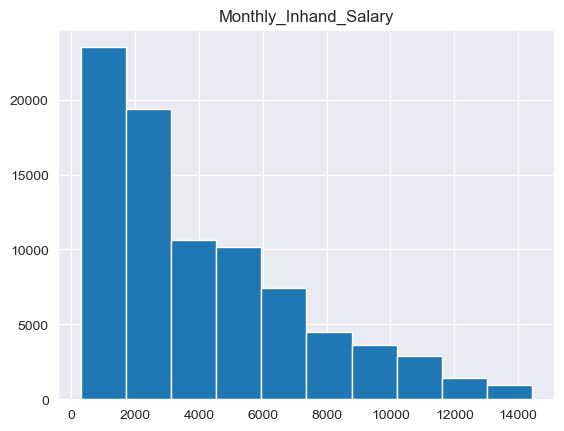

In [60]:
df.hist(['Monthly_Inhand_Salary'])


In [122]:
df["Monthly_Inhand_Salary"].mean()


4140.380237574872

<AxesSubplot:ylabel='Monthly_Inhand_Salary'>

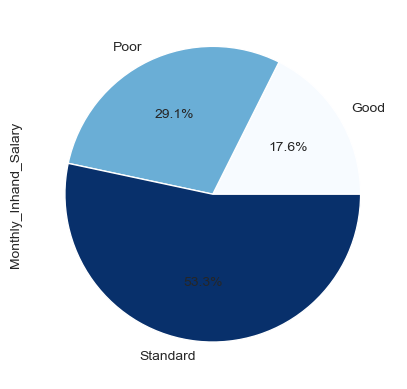

In [116]:
df[['Credit_Score', 'Monthly_Inhand_Salary']].groupby('Credit_Score')['Monthly_Inhand_Salary'].count().plot.pie(colormap='Blues', autopct='%1.1f%%')

array([[<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>]],
      dtype=object)

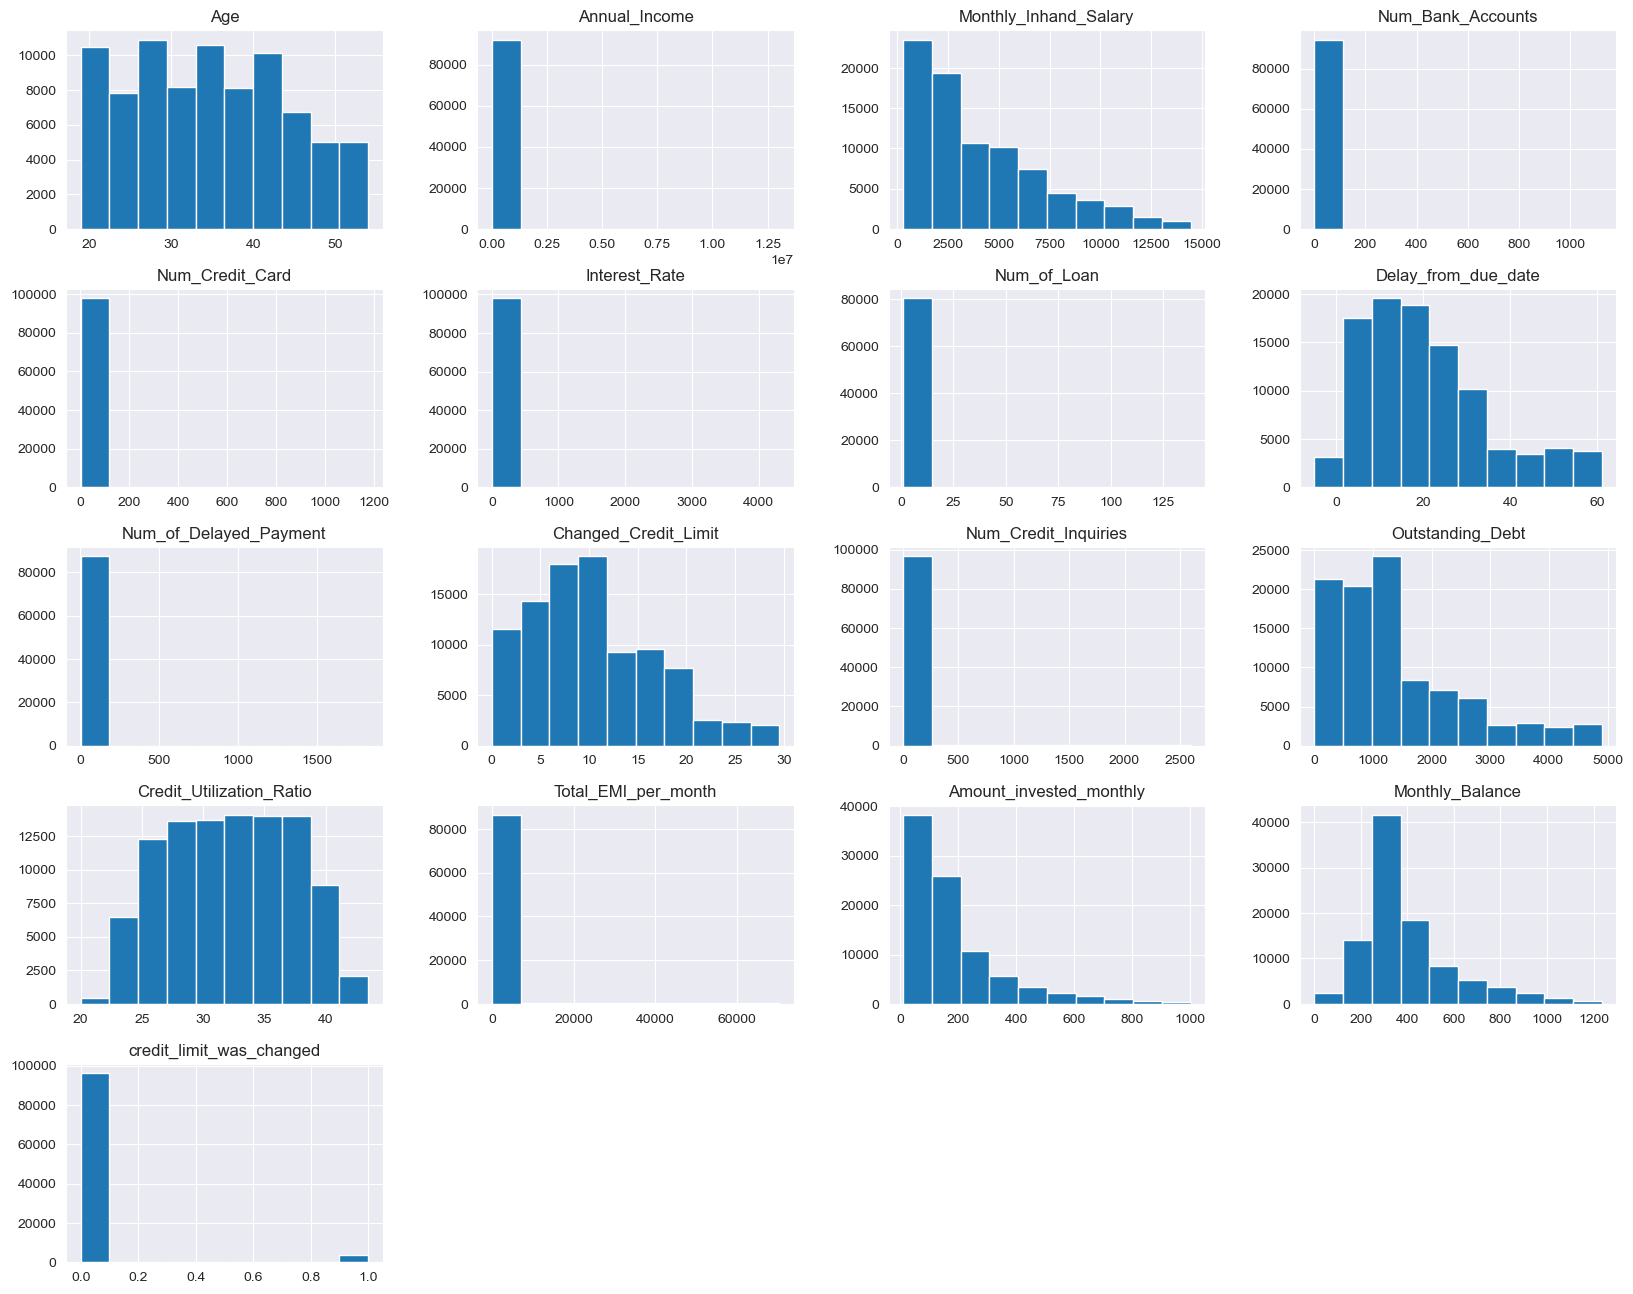

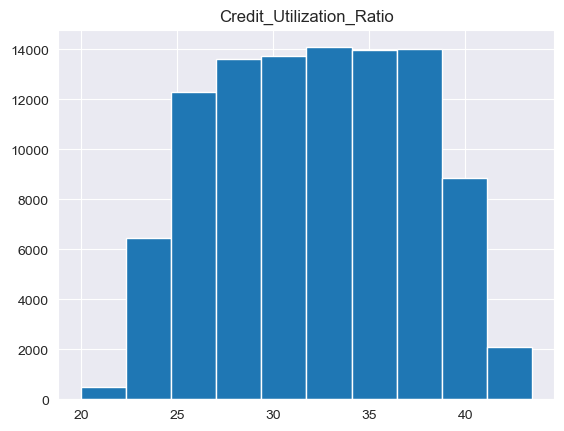

In [117]:
df.hist(figsize=[20, 16])
df.hist(['Credit_Utilization_Ratio'])

In [123]:
df["Credit_Utilization_Ratio"].mean()

32.22238753160519

In [5]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('processed_with_no_strings.csv', encoding='utf-8')
colnames = list(df.columns[1:-1])
df.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_limit_was_changed
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,0


<AxesSubplot:xlabel='Annual_Income', ylabel='Interest_Rate'>

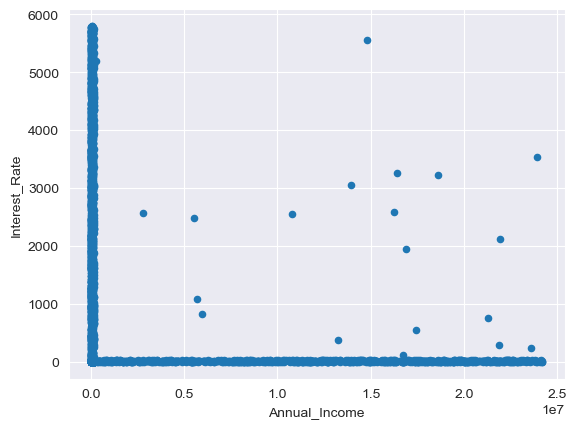

In [8]:
df[['Annual_Income', 'Interest_Rate']].plot.scatter(x='Annual_Income', y='Interest_Rate')

In [153]:
import numpy as np


log_df = df.copy()

log_df['Annual_Income'] = log_df['Annual_Income'].apply(np.log1p)
log_df['Credit_Utilization_Ratio'] = log_df['Credit_Utilization_Ratio'].apply(np.log1p)

<AxesSubplot:xlabel='Annual_Income', ylabel='Credit_Utilization_Ratio'>

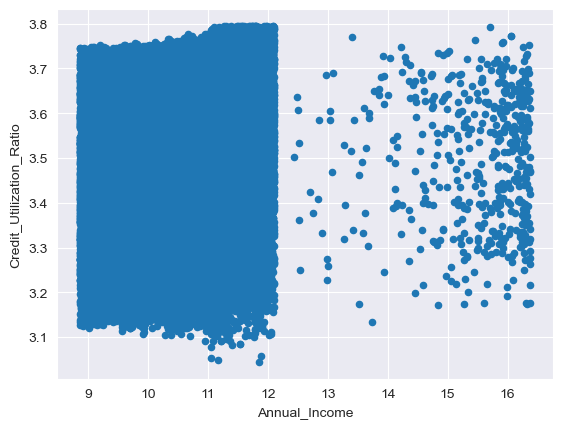

In [154]:
log_df[['Annual_Income', 'Credit_Utilization_Ratio']].plot.scatter(x='Annual_Income', y='Credit_Utilization_Ratio')

<AxesSubplot:xlabel='Annual_Income', ylabel='Interest_Rate'>

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


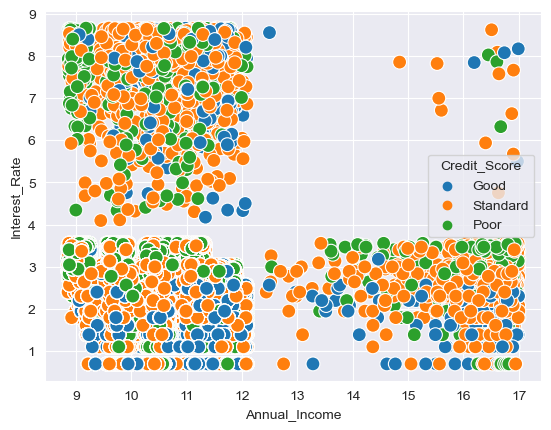

In [25]:
import seaborn as sns

# Create a scatter plot with labels
sns.scatterplot(data=log_df, x='Annual_Income', y='Interest_Rate', hue='Credit_Score', s=100)

array([[<AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>]], dtype=object)

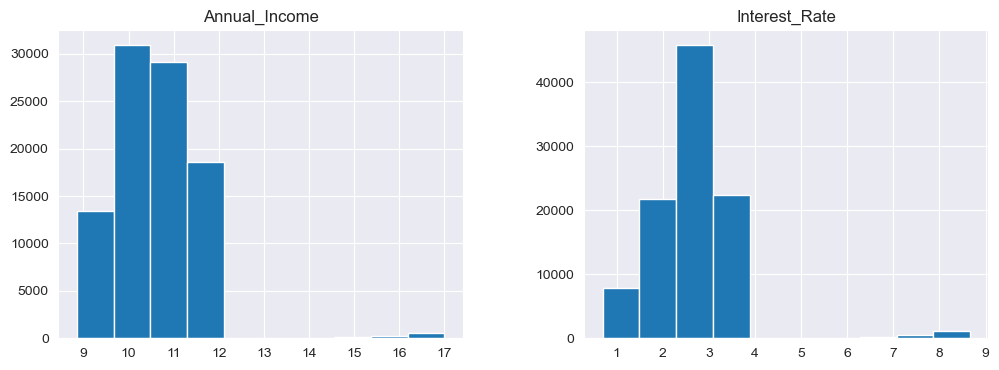

In [19]:
log_df[['Annual_Income', 'Interest_Rate']].hist(figsize=[12, 4])

# clustering

In [155]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [85]:
# kmeans.fit(df[[col for col in df.columns if col != 'Credit_Score']])
kmeans.fit(preprocessed_df)
pca.fit(preprocessed_df)

PCA(n_components=2)

In [89]:
from matplotlib import pyplot as plt

# Create a DataFrame containing the results of K-Means clustering and PCA
cluster_labels = kmeans.labels_
pca_components = pca.transform(preprocessed_df)
clustered_data = pd.DataFrame({'Cluster': cluster_labels, 'PCA1': pca_components[:, 0], 'PCA2': pca_components[:, 1], 'Label': target})



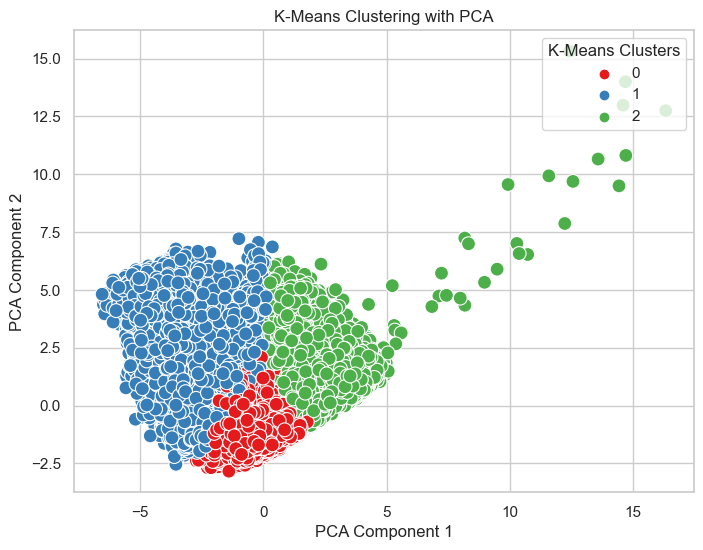

In [90]:
# Set up the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a scatter plot with clusters as labels
sns.scatterplot(data=clustered_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)

# Add labels and a legend
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with PCA")
plt.legend(title='K-Means Clusters', loc='upper right')

# Show the plot
plt.show()

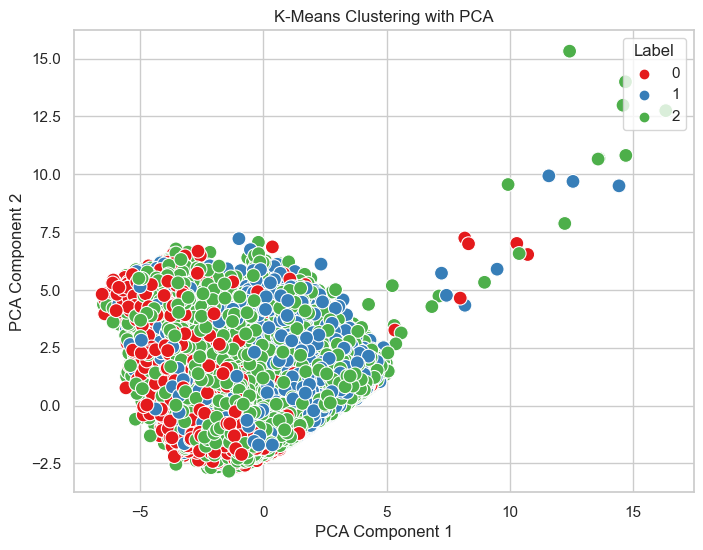

In [91]:
# Set up the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a scatter plot with clusters as labels
sns.scatterplot(data=clustered_data, x='PCA1', y='PCA2', hue='Label', palette='Set1', s=100)

# Add labels and a legend
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with PCA")
plt.legend(title='Label', loc='upper right')

# Show the plot
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>],
       [<AxesSubplot:title={'center':

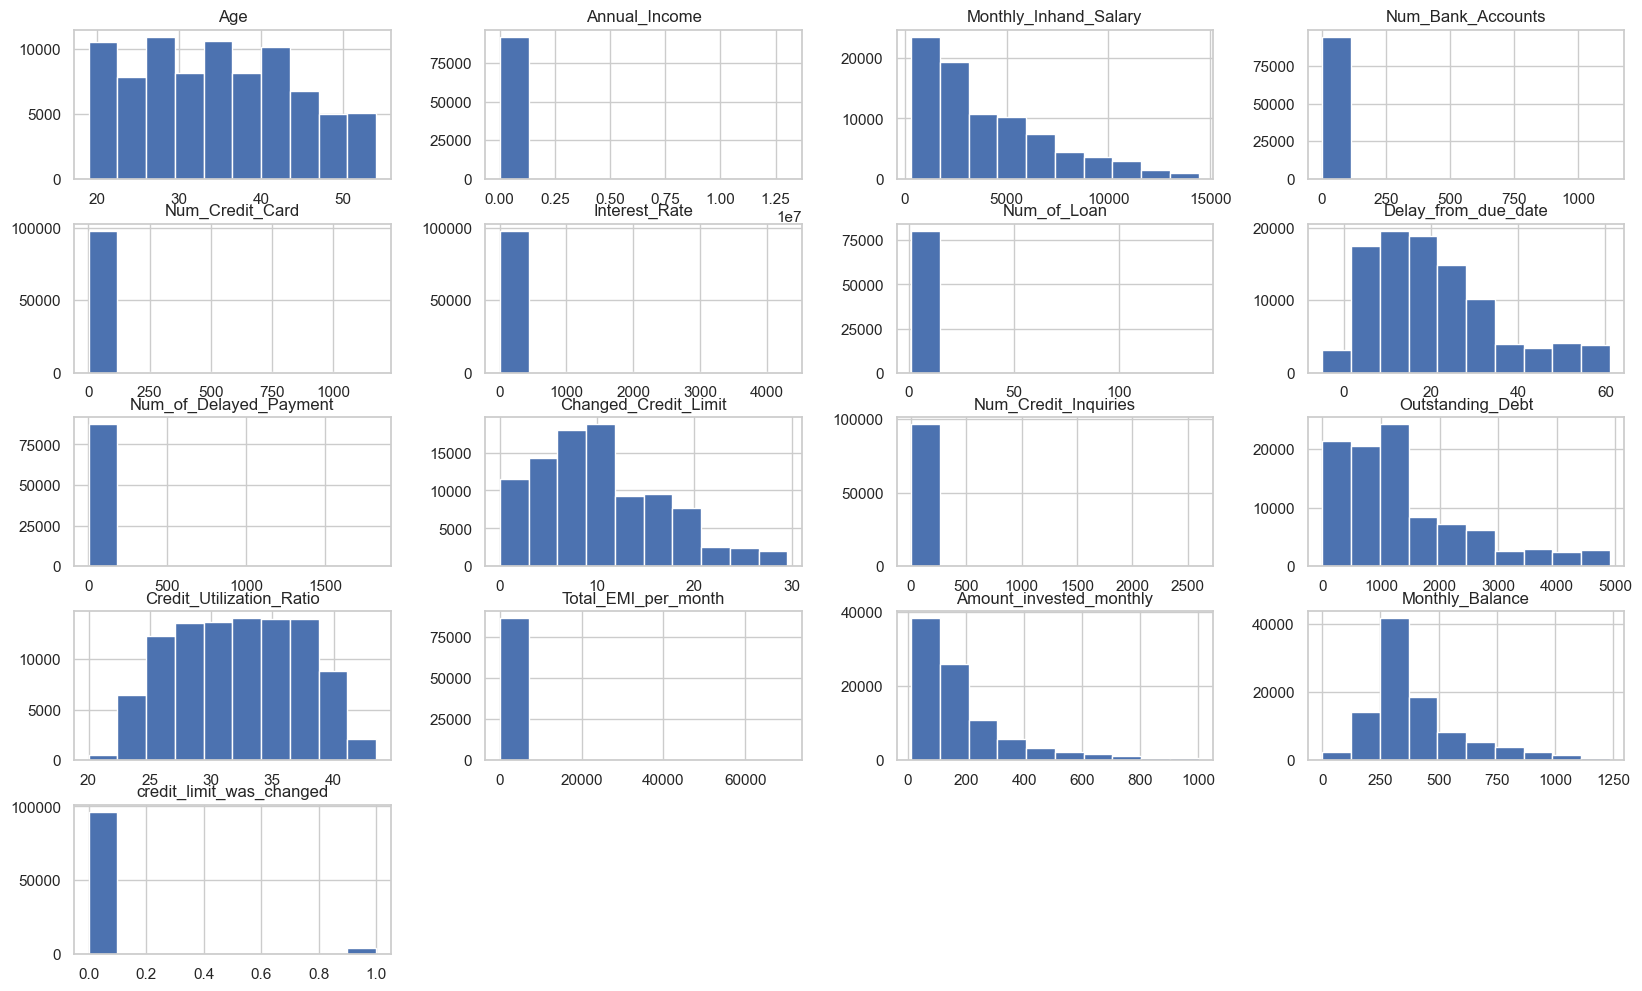

In [97]:
df.hist(figsize=[20, 12])

In [157]:
columns_to_log = [
        
        'Num_Bank_Accounts',
        'Num_Credit_Card',
        'Interest_Rate',
        'Num_of_Loan',
        'Num_of_Delayed_Payment',
        'Num_Credit_Inquiries',
        'Outstanding_Debt',
        'Total_EMI_per_month',
        'Amount_invested_monthly',
        'Monthly_Balance',
    ]

columns_to_leave_as_it_is = [
        'Annual_Income',
        'Monthly_Inhand_Salary',
        'Age',
        'Delay_from_due_date',
        'Changed_Credit_Limit',
        'Credit_Utilization_Ratio',
        'credit_limit_was_changed'
    ]

log_df = df[columns_to_log + columns_to_leave_as_it_is]

In [158]:
import numpy as np

for col in columns_to_log:
    log_df.loc[col] = np.log1p(log_df[col])


C:\Users\Татьяна\AppData\Local\Temp\ipykernel_9984\2614640502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Татьяна\AppData\Local\Temp\ipykernel_9984\2614640502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Татьяна\AppData\Local\Temp\ipykernel_9984\2614640502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Татьяна\AppData\Local\Temp\ipykernel_9984\2614640502.py:4: SettingWithCopyWarning: 
A value is

In [159]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')

In [160]:
scaled_data = scaler.fit_transform(log_df)
imputed_data = imputer.fit_transform(scaled_data)
normal_data = pd.DataFrame(imputed_data, columns=list(log_df.columns))

In [161]:
normal_data.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Age,Delay_from_due_date,Changed_Credit_Limit,Credit_Utilization_Ratio,credit_limit_was_changed
0,-0.124665,-0.132827,-0.146151,-0.008329,-0.161597,-0.122967,-0.529677,-0.163446,-0.613051,-0.418647,-0.118077,-0.746692,-1.200305,-1.227990,0.119104,-1.068931,-0.195491
1,-0.124665,-0.132827,-0.146151,-0.008329,-0.042783,-0.122967,-0.529677,-0.163446,-0.392620,-0.555268,-0.118077,-0.342641,-1.200305,-1.504913,0.119104,-0.054919,-0.195491
2,-0.124665,-0.132827,-0.146151,-0.008329,-0.161597,-0.122967,-0.529677,-0.163446,-0.605575,-0.326883,-0.118077,-0.342641,-0.048121,-1.227990,-0.154986,-0.715232,5.115323
3,-0.124665,-0.132827,-0.146151,-0.008329,-0.212518,-0.122967,-0.529677,-0.163446,0.079958,-0.855223,-0.118077,-0.342641,-1.200305,-1.089528,-0.650811,-0.167181,-0.195491
4,-0.124665,-0.132827,-0.146151,-0.008329,-0.042783,-0.122967,-0.529677,-0.163446,-0.840062,-0.276484,-0.118077,-0.746692,-1.200305,-1.020297,0.119104,-1.469851,-0.195491


In [162]:
# kmeans.fit(df[[col for col in df.columns if col != 'Credit_Score']])
kmeans.fit(log_df)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [78]:
prediction = kmeans.predict(log_df)


In [79]:
confusion_matrix(target, prediction)

array([[17771,    30,    27],
       [28908,    55,    35],
       [52948,   108,   118]], dtype=int64)

In [124]:
kmeans.fit(normal_data)
prediction = kmeans.predict(normal_data)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=23), k=(2, 24))

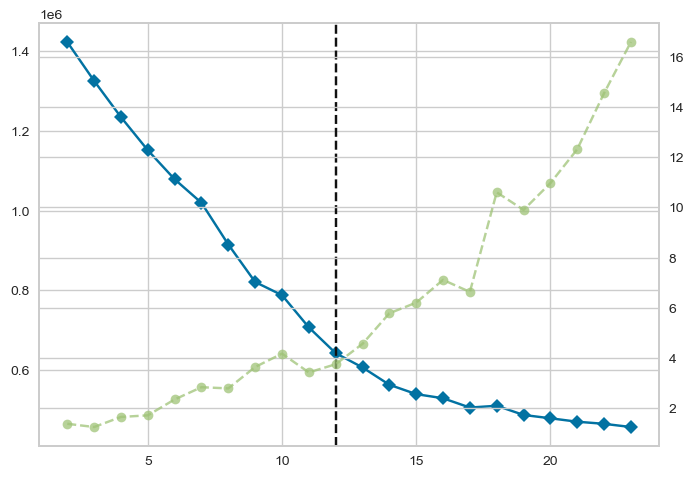

In [128]:
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, 24))  # You can adjust the range of k as needed
visualizer.fit(normal_data)


In [138]:
visualizer.show()





YellowbrickAttributeError: neither visualizer 'KElbowVisualizer' nor wrapped estimator 'DBSCAN' have attribute 'axes'

ValueError: Invalid parameter n_clusters for estimator DBSCAN(). Check the list of available parameters with `estimator.get_params().keys()`.

In [129]:
from sklearn.cluster import DBSCAN

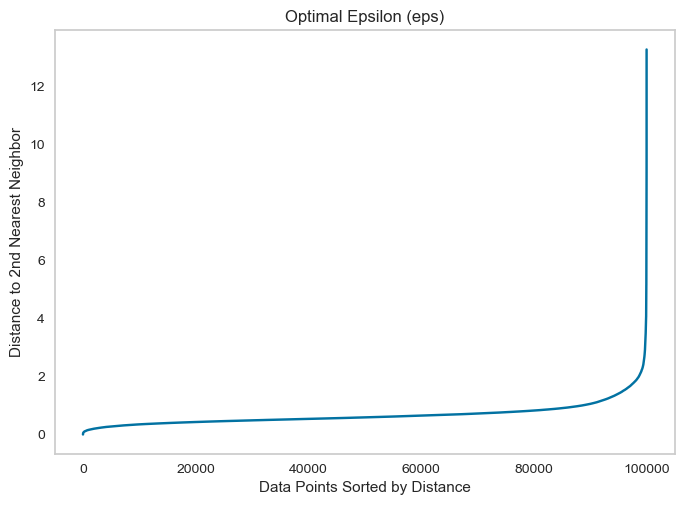

In [139]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit a nearest neighbors model to find the optimal epsilon (eps) value
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(normal_data)
distances, indices = neighbors_fit.kneighbors(normal_data)

# Sort the distances and plot them to determine the optimal eps
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Consider the 2nd nearest neighbor (the first is itself)

# Plot the sorted distances
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.title('Optimal Epsilon (eps)')
plt.grid()

# You can then visually inspect the plot to find the 'knee' point.
plt.show()


In [163]:
dbscan = DBSCAN(eps=2)

In [165]:
normal_sample = normal_data.sample(10000)

In [166]:
dbscan.fit(normal_sample)

DBSCAN(eps=2)

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normal_sample)

In [176]:
# Create a new DataFrame with the two principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

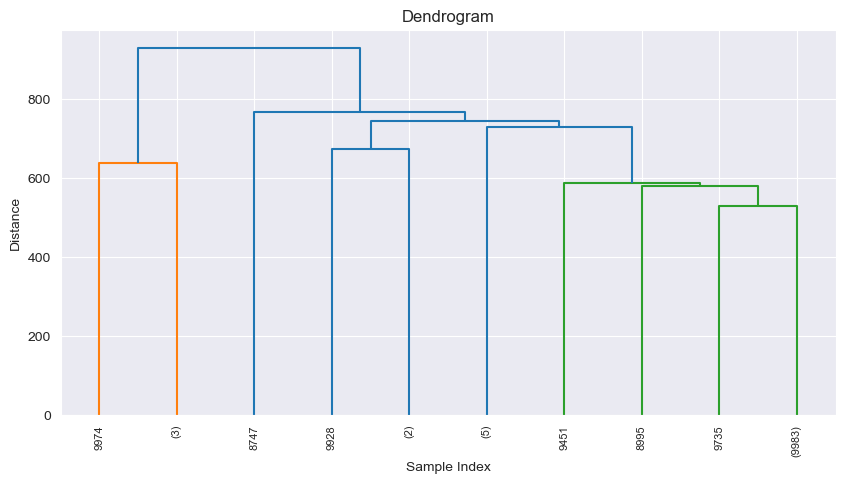

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical agglomerative clustering
model = AgglomerativeClustering(n_clusters=8)  # distance_threshold=0
model.fit(normal_sample)

# Create linkage matrix
linkage_matrix = linkage(model.children_)

# Create and plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, p=10, truncate_mode='lastp', leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [214]:
# model.children_

In [189]:
kmeans.fit(normal_sample)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=3)

In [238]:
# df_pca['target'] = df.loc[pd.Series(df.index).isin(normal_sample.index)]['Credit_Score'].values
labels = dbscan.labels_
# labels = kmeans.labels_
# labels = model.labels_

df_pca['labels'] = labels

In [216]:
df_pca.head()

,Principal Component 1,Principal Component 2,labels
0,-1.192282,0.066615,0
1,1.323627,0.603211,2
2,-0.204292,-1.204347,0
3,-0.257804,-1.325682,0
4,-2.133644,-0.726228,0


In [217]:
pd.Series(labels).nunique()

8

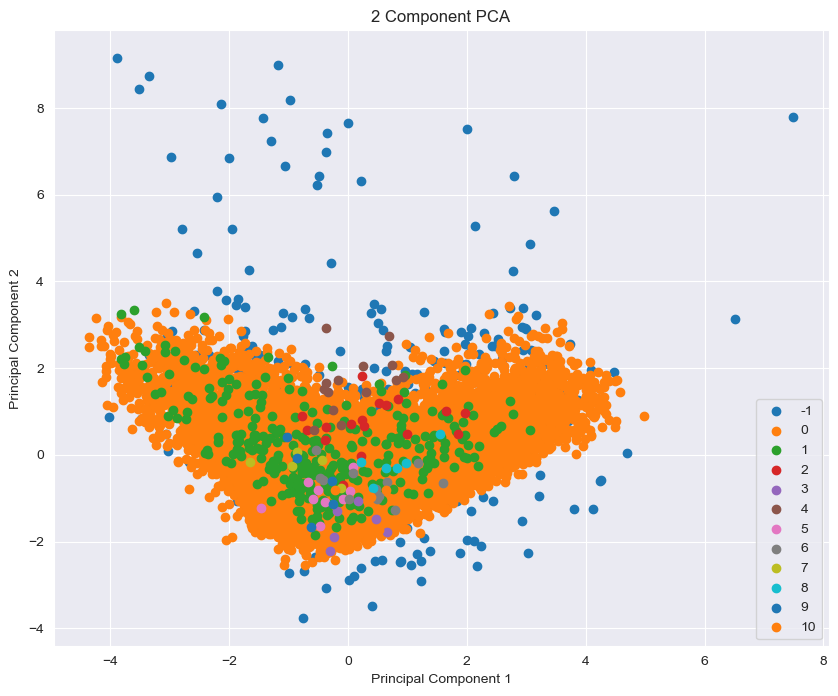

In [239]:
import numpy as np

plt.figure(figsize=(10, 8))

# Plot each category
for label in np.unique(labels):
    plt.scatter(
        df_pca.loc[df_pca.labels == label]['Principal Component 1'],
        df_pca.loc[df_pca.labels == label]['Principal Component 2'],
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()

In [220]:
sample_target = df.loc[pd.Series(normal_data.index).isin(normal_sample.index)]['Credit_Score']

In [229]:
df_pca['target'] = sample_target

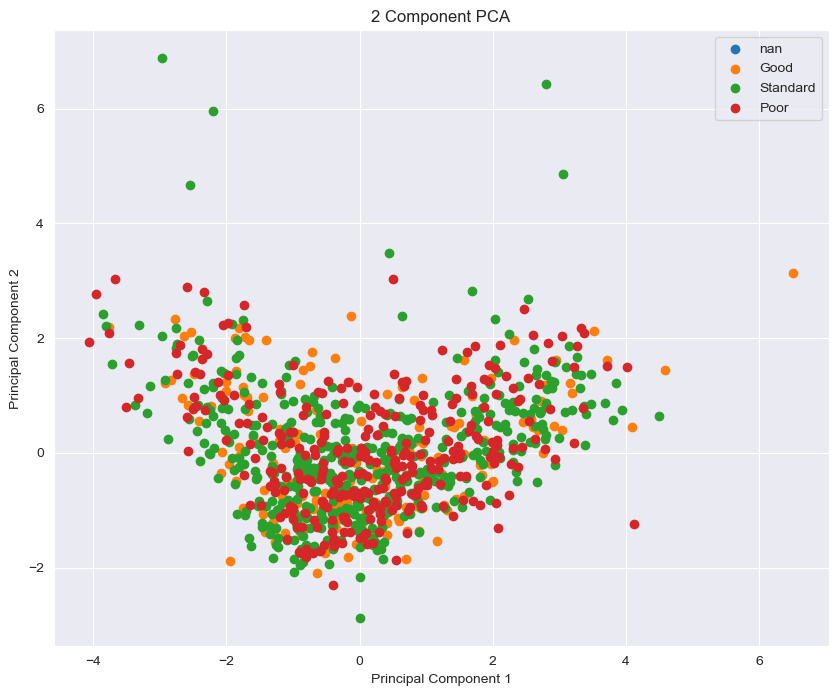

In [230]:
import numpy as np

plt.figure(figsize=(10, 8))


# Plot each category
for label in df_pca['target'].unique():
    plt.scatter(
        df_pca.loc[df_pca['target'] == label]['Principal Component 1'],
        df_pca.loc[df_pca['target'] == label]['Principal Component 2'],
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()

In [147]:
from sklearn import tree

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_limit_was_changed
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,0


In [79]:
target = 'Credit_Score'

In [80]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from CSV


# Assuming that the last column is your target feature
X = preprocessed_df.iloc[:, :-1]  # Features (all columns except the last one)
y = preprocessed_df.iloc[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, df[target], test_size=0.2, random_state=42)

# Create the decision tree model
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6919


In [72]:
X_train.shape, X_test.shape

((80000, 46), (20000, 46))

In [81]:
confusion_matrix(y_test, y_pred)

array([[2135,  266, 1126],
       [ 319, 3736, 1819],
       [1287, 1345, 7967]], dtype=int64)

In [82]:
from treeinterpreter import treeinterpreter as ti

In [83]:
ti.predict(clf, X_test)

(array([[5.11711404e-01, 1.06770388e-01, 3.81518208e-01],
        [3.12377977e-02, 3.99843811e-01, 5.68918391e-01],
        [5.55555556e-01, 0.00000000e+00, 4.44444444e-01],
        ...,
        [9.53408455e-02, 1.07248462e-01, 7.97410693e-01],
        [9.53408455e-02, 1.07248462e-01, 7.97410693e-01],
        [7.16460684e-04, 7.97062511e-01, 2.02221028e-01]]),
 array([[0.1787625, 0.28905  , 0.5321875],
        [0.1787625, 0.28905  , 0.5321875],
        [0.1787625, 0.28905  , 0.5321875],
        ...,
        [0.1787625, 0.28905  , 0.5321875],
        [0.1787625, 0.28905  , 0.5321875],
        [0.1787625, 0.28905  , 0.5321875]]),
 array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 6.89068371e-02, -2.35907048e-

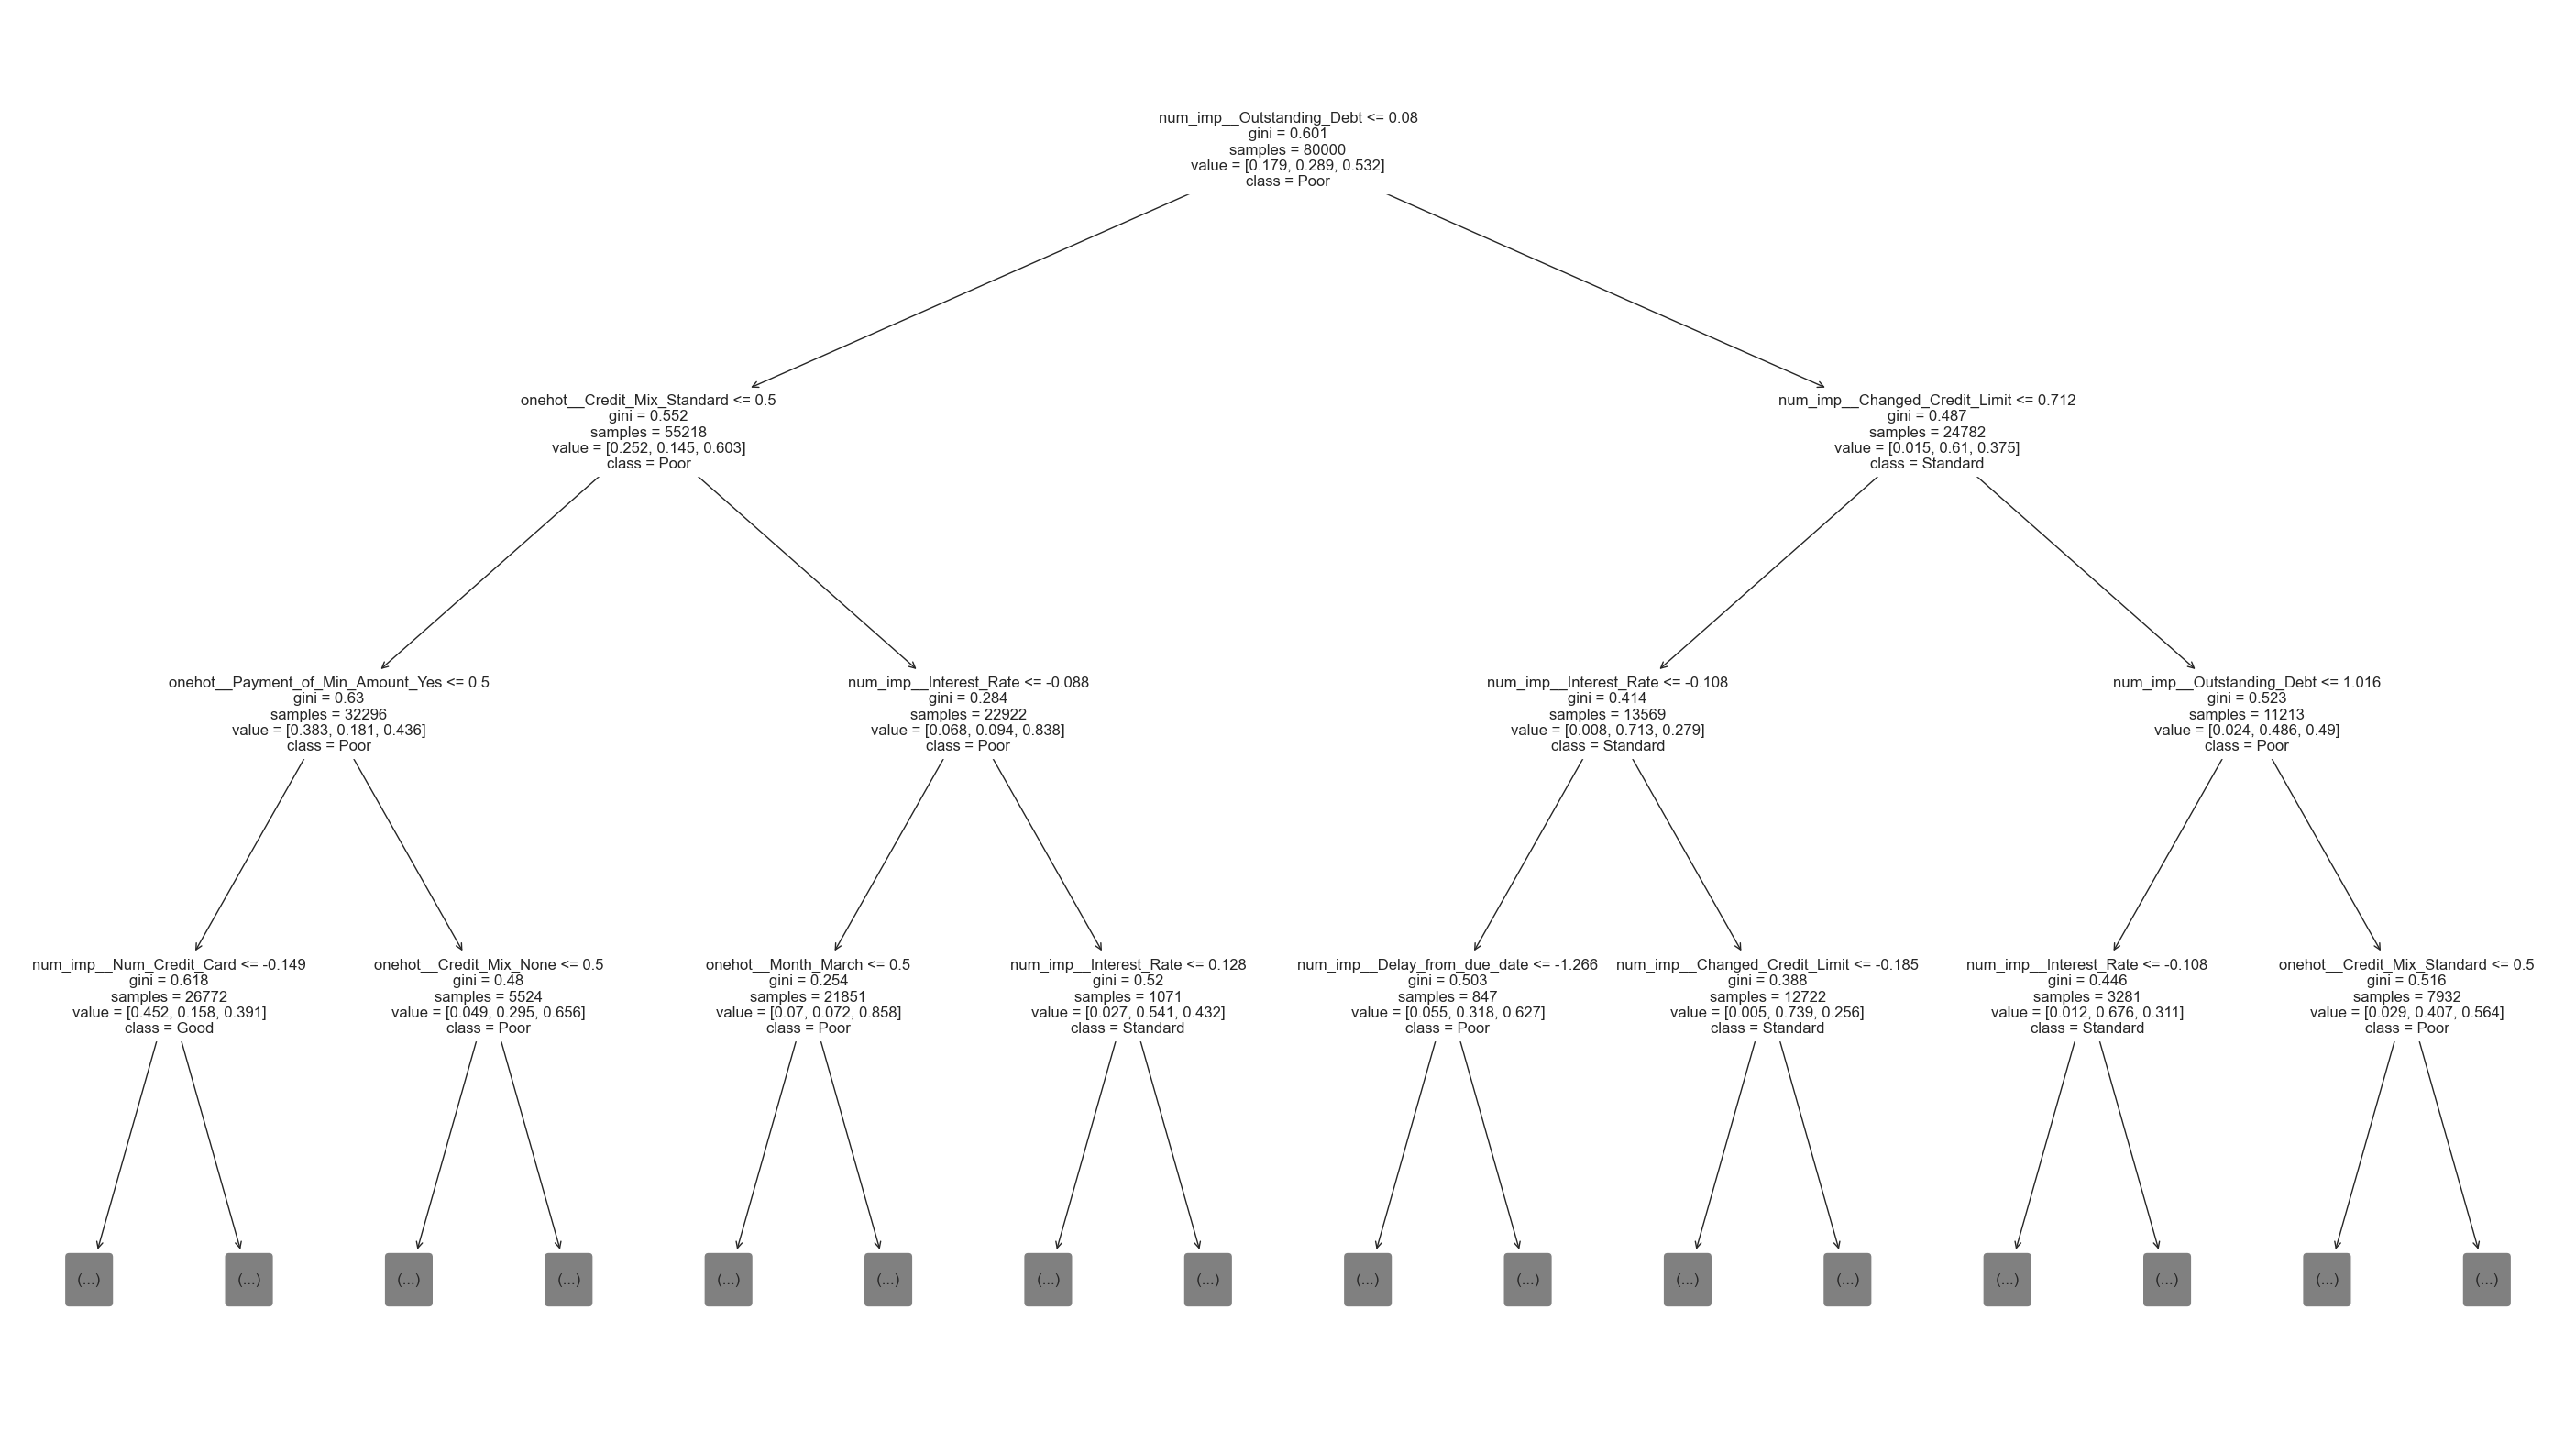

In [92]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=[36, 20])

plot_tree(
    clf, 
    filled=True, 
    feature_names=list(preprocessed_df.columns), 
    rounded=True, 
    class_names=df.Credit_Score.unique(),
    max_depth=3,
    fontsize=12,
)

plt.show()

In [65]:
preprocessed_df.columns

Index(['num_imp__Age', 'num_imp__Annual_Income',
       'num_imp__Monthly_Inhand_Salary', 'num_imp__Num_Bank_Accounts',
       'num_imp__Num_Credit_Card', 'num_imp__Interest_Rate',
       'num_imp__Num_of_Loan', 'num_imp__Delay_from_due_date',
       'num_imp__Num_of_Delayed_Payment', 'num_imp__Outstanding_Debt',
       'num_imp__Credit_Utilization_Ratio', 'num_imp__Amount_invested_monthly',
       'num_imp__Total_EMI_per_month', 'num_imp__Amount_invested_monthly',
       'num_imp__Monthly_Balance', 'num_imp__Changed_Credit_Limit',
       'onehot__Month_April', 'onehot__Month_August', 'onehot__Month_February',
       'onehot__Month_January', 'onehot__Month_July', 'onehot__Month_June',
       'onehot__Month_March', 'onehot__Month_May',
       'onehot__Occupation_Accountant', 'onehot__Occupation_Architect',
       'onehot__Occupation_Developer', 'onehot__Occupation_Doctor',
       'onehot__Occupation_Engineer', 'onehot__Occupation_Entrepreneur',
       'onehot__Occupation_Journalist', 'o

In [51]:
X_train['onehot__Payment_of_Min_Amount_NM'].unique()

array([0., 1.])

In [93]:
!pip install dtreeviz

     -------------------------------------- 91.8/91.8 kB 741.2 kB/s eta 0:00:00


In [5]:
from sklearn import tree
from dtreeviz import model

# Assuming that you have already created and trained your decision tree classifier (clf)

# Visualize the decision tree
viz = model(
    clf, 
    X_test, 
    y_test,
    feature_names=list(preprocessed_df.columns),
    class_names=list(df.Credit_Score.unique()),
)


NameError: name 'clf' is not defined

In [124]:
# Display the decision table
viz.view()

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

In [126]:
def get_decision_table(tree, feature_names, class_names, max_depth=None):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined" for i in tree_.feature]
    table = []

    def recurse(node, rules, depth):
        if max_depth is not None and depth > max_depth:
            return
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], rules + [(name, f"<= {threshold:.2f}")], depth+1)
            recurse(tree_.children_right[node], rules + [(name, f"> {threshold:.2f}")], depth+1)
        else:
            dist = tree_.value[node][0]
            total = np.sum(dist)
            probs = [round(d / total, 2) for d in dist]
            max_class = np.argmax(dist)
            max_class_name = class_names[max_class]

            row = {name: condition for name, condition in rules}
            row['Outcome'] = max_class_name
            table.append(row)

    recurse(0, [], 0)
    return pd.DataFrame(table).fillna("")

In [125]:
viz

In [95]:
!pip install --upgrade dtreeviz

In [2]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

In [3]:
mlp.fit(X_train, y_train)
# Get the number of layers in the MLP classifier
num_layers = mlp.n_layers_

# Print the number of layers
print("Number of layers in the MLP classifier:", num_layers)


NameError: name 'X_train' is not defined

In [4]:
p_train, p_test = mlp.predict(X_train), mlp.predict(X_test)
p_train_proba, p_test_proba = mlp.predict_proba(X_train), mlp.predict_proba(X_test)

NameError: name 'X_train' is not defined

In [235]:
print('Test metrics')
print(confusion_matrix(y_test, p_test))
print(classification_report(y_test, p_test))


print('Train metrics')
print(confusion_matrix(y_train, p_train))
print(classification_report(y_train, p_train))

Test metrics
[[1900  191 1436]
 [ 302 3899 1673]
 [1132 1796 7671]]
              precision    recall  f1-score   support

        Good       0.57      0.54      0.55      3527
        Poor       0.66      0.66      0.66      5874
    Standard       0.71      0.72      0.72     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.67      0.67      0.67     20000

Train metrics
[[ 8586   637  5078]
 [ 1042 16333  5749]
 [ 3760  6403 32412]]
              precision    recall  f1-score   support

        Good       0.64      0.60      0.62     14301
        Poor       0.70      0.71      0.70     23124
    Standard       0.75      0.76      0.76     42575

    accuracy                           0.72     80000
   macro avg       0.70      0.69      0.69     80000
weighted avg       0.72      0.72      0.72     80000


In [1]:
# Get the number of layers in the MLP classifier
num_layers = mlp.n_layers_

# Print the number of layers
print("Number of layers in the MLP classifier:", num_layers)

NameError: name 'mlp' is not defined